In [3]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.9 MB/s eta 0:00:00


# Домашнее задание №3. Нечеткая логика

### Задание

Усовершенствуйте систему вычисления чаевых, рассмотренную на семинаре. Добавляйте новые правила, изменяйте количество нечетких множеств, и попробуйте сделать более реалистичную систему.

22
5
7
19
18


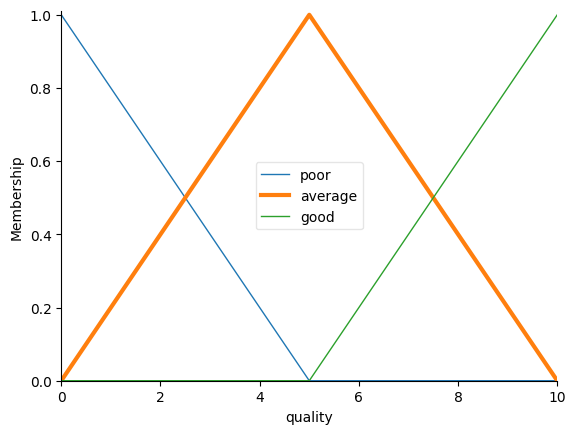

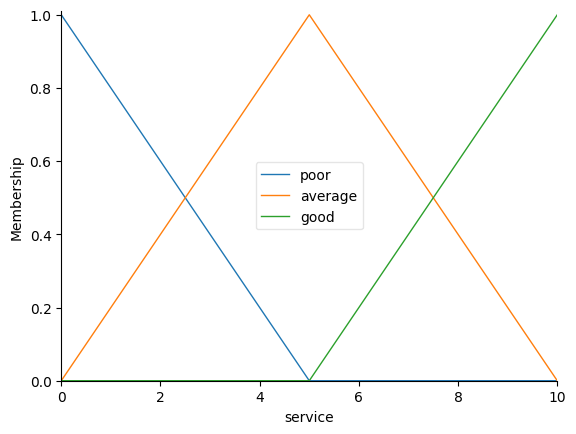

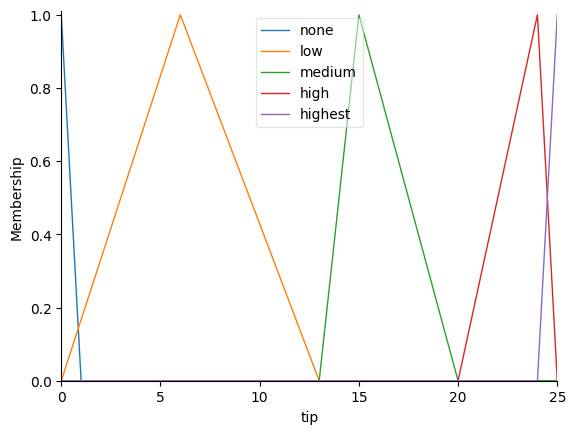

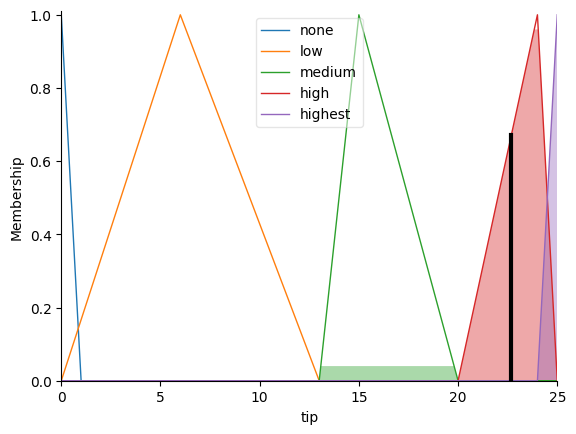

In [7]:
# Напишите свой код в данной ячейке
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

quality.automf(3)
service.automf(3)
#quality['poor'] = fuzz.trimf(quality.universe, [0, 1, 4])
#quality['average'] = fuzz.trimf(quality.universe, [3, 5, 10])
#quality['good'] = fuzz.trimf(quality.universe, [9, 11, 13])

#service['poor'] = fuzz.trimf(service.universe, [0, 1, 4])
#service['average'] = fuzz.trimf(service.universe, [3, 5, 10])
#service['good'] = fuzz.trimf(service.universe, [9, 11, 13])

tip['none'] = fuzz.trimf(tip.universe, [0, 0, 0])
tip['low'] = fuzz.trimf(tip.universe, [0, 6, 13])
tip['medium'] = fuzz.trimf(tip.universe, [13, 15, 20])
tip['high'] = fuzz.trimf(tip.universe, [20, 24, 25])
tip['highest'] = fuzz.trimf(tip.universe, [25, 25, 25])

quality['average'].view()
service.view()
tip.view()

#rule1 = ctrl.Rule(quality['poor'] & service['poor'] | quality['average'] & service['average'] , tip['none'])
#rule2 = ctrl.Rule((service['average'] & ~quality['poor'] & ~quality['good'])|(quality['average'] & ~service['poor'] & ~service['good']), tip['medium'])
#rule3 = ctrl.Rule((service['good'] & ~quality['good'])|(quality['good'] & ~service['good']), tip['high'])
#rule4 = ctrl.Rule((quality['average'] & (service['poor']|service['average']))|(service['average'] & (quality['poor']|quality['average'])), tip['low'])
#rule5 = ctrl.Rule(quality['good'] & service['good'], tip['highest'])
#tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['none'])
rule2 = ctrl.Rule(quality['average'] | service['average'], tip['medium'])
rule3 = ctrl.Rule(quality['good'] | service['good'],tip['high'])
rule4 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule5 = ctrl.Rule(quality['good'] & service['good'], tip['highest'])
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['quality'] = 9.8
tipping.input['service'] = 9.8
tipping.compute()
print(int(tipping.output['tip']))
tip.view(sim=tipping)
tipping.input['quality'] = 0.0
tipping.input['service'] = 0.0
tipping.compute()
print(int(tipping.output['tip']))
tipping.input['quality'] = 0.0
tipping.input['service'] = 1.0
tipping.compute()
print(int(tipping.output['tip']))
tipping.input['quality'] = 9.0
tipping.input['service'] = 6.0
tipping.compute()
print(int(tipping.output['tip']))
tipping.input['quality'] = 9.8
tipping.input['service'] = 5.0
tipping.compute()
print(int(tipping.output['tip']))